In [1]:
import numpy as np

# Image

In [16]:
size = 1
MAX_VALUE = 255
MIN_VALUE = 0
IMAGE_SIZE_X = 20
IMAGE_SIZE_Y = 20
xCenter = IMAGE_SIZE_X/2
yCenter = IMAGE_SIZE_Y/2
l = 1

#I = np.ceil((MAX_VALUE - MIN_VALUE) * np.random.rand(size) + MIN_VALUE)
#Cx = np.ceil((IMAGE_SIZE_X)/2 + SIGMA*np.random.randn(size)).astype('int')
#Cx = np.clip(Cx,0,IMAGE_SIZE_X)
#Cy = np.ceil((IMAGE_SIZE_Y)/2 +  SIGMA*np.random.randn(size)).astype('int')
#Cy = np.clip(Cy,0,IMAGE_SIZE_Y)

I = np.array([180])
Cx = np.array([7])
Cy = np.array([-4])

minI = np.min(I)
argminI = np.argmin(I)
maxI = np.max(I)
argmaxI = np.argmax(I)

print('min I: %s at (%s,%s)\n' \
      'max I: %s at (%s,%s)\n' % (minI, Cx[argminI], Cy[argminI],
                                  maxI, Cx[argmaxI], Cy[argmaxI]))

min I: 180 at (7,-4)
max I: 180 at (7,-4)



In [17]:
def psi(x, y, l, Cx, Cy):
    return (1.0 / (np.sqrt(2.0 * np.pi) * l)) * np.exp(-(1.0 / 2) * ((x - Cx) * (x - Cx) + (y - Cy) * (y - Cy)) / (l * l))

G_SIZE_REAL =  500
x = np.linspace(0,IMAGE_SIZE_X,G_SIZE_REAL) - xCenter
y = np.linspace(0,IMAGE_SIZE_Y,G_SIZE_REAL) - yCenter
G = np.zeros([G_SIZE_REAL, G_SIZE_REAL])

for j in range(G_SIZE_REAL):
    for i in range(G_SIZE_REAL):
        G[j,i] = I*psi(x[i],y[j],l,Cx,Cy)
        
G_fft = np.fft.fft2(G)
G_fft = np.fft.fftshift(G_fft)

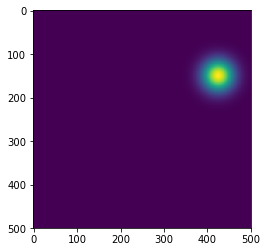

In [18]:
import matplotlib.pyplot as plt

plt.imshow(G)
plt.show()

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

# 3D plotting
fig = plt.figure(figsize=plt.figaspect(0.5))
ax = fig.add_subplot(4, 3, 1, projection='3d')

X, Y = np.meshgrid(x, y)

## Plot the surface.
surf = ax.plot_surface(X, Y, G, cmap=cm.viridis)
## Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)
ax.set_title("Pixel Image")

####
####

# 3D plotting
ax = fig.add_subplot(4, 3, 4, projection='3d')

## Plot the surface.
surf = ax.plot_surface(X, Y, G_fft.real, cmap=cm.viridis)
## Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)
ax.set_title("Real Part")


# 3D plotting
ax = fig.add_subplot(4, 3, 5, projection='3d')
## Plot the surface
surf = ax.plot_surface(X, Y, G_fft.imag, cmap=cm.viridis)
## Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)
ax.set_title("Imaginary Part")

#####

# 3D plotting
ax = fig.add_subplot(4, 3, 7, projection='3d')

G_real_abs_fft = np.sqrt(G_fft.real**2)

## Plot the surface.
surf = ax.plot_surface(X, Y, G_real_abs_fft, cmap=cm.viridis)
## Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)
ax.set_title("Abs Real Part")


# 3D plotting
ax = fig.add_subplot(4, 3, 8, projection='3d')
G_imag_abs_fft = np.sqrt(G_fft.imag**2)
## Plot the surface
surf = ax.plot_surface(X, Y, G_imag_abs_fft, cmap=cm.viridis)
## Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)
ax.set_title("Abs Imaginary Part")


# 3D plotting
ax = fig.add_subplot(4, 3, 9, projection='3d')

G_abs_fft = np.sqrt(G_fft.real**2+G_fft.imag**2)

## Plot the surface.
surf = ax.plot_surface(X, Y, G_abs_fft, cmap=cm.viridis)
## Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)
ax.set_title("Abs")
                    
# 3D plotting
ax = fig.add_subplot(4, 3, 10, projection='3d')

G_real_log_fft = np.log(np.sqrt(G_fft.real**2)+10**(-80))

## Plot the surface.
surf = ax.plot_surface(X, Y, G_real_log_fft, cmap=cm.viridis)
## Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)
ax.set_title("Log Abs Real")

# 3D plotting
ax = fig.add_subplot(4, 3, 11, projection='3d')

G_real_log_fft = np.log(np.sqrt(G_fft.imag**2)+10**(-80))

## Plot the surface.
surf = ax.plot_surface(X, Y, G_real_log_fft, cmap=cm.viridis)
## Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)
ax.set_title("Log Abs Imag")

# 3D plotting
ax = fig.add_subplot(4, 3, 12, projection='3d')

G_log_abs_fft = np.log(np.sqrt(G_fft.real**2+G_fft.imag**2)+10**(-80))

## Plot the surface.
surf = ax.plot_surface(X, Y, G_log_abs_fft, cmap=cm.viridis)
## Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)
ax.set_title("Log Abs")  

fig.set_figheight(47)
fig.set_figwidth(50)



plt.savefig('Fourier_test.pdf', format='pdf')
plt.show(fig)

In [ ]:
fig, ax = plt.subplots(1,3)

my_countor = ax[0].contour(X,Y,G_fft.real,
                           cmap=plt.cm.viridis)
fig.colorbar(my_countor, ax=ax[0], shrink=0.9)
#zc = my_countor.collections[6]
#plt.setp(zc, linewidth=4)

my_countor = ax[1].contour(X,Y,G_fft.imag,
                           cmap=plt.cm.viridis)
fig.colorbar(my_countor, ax=ax[1], shrink=0.9)
#zc = my_countor.collections[6]
#plt.setp(zc, linewidth=4)

my_countor = ax[2].contour(X,Y,np.log(np.abs(G_fft)),
                           cmap=plt.cm.viridis)
fig.colorbar(my_countor, ax=ax[2], shrink=0.9)
#zc = my_countor.collections[6]
#plt.setp(zc, linewidth=4)

fig.set_figheight(5)
fig.set_figwidth(20)
plt.tight_layout()

plt.show(fig)

# Model

In [ ]:
from scipy.special import erf

In [ ]:
import theano.tensor as tt
import numpy as np

# basis function
def phi(u, v, l, Cx, Cy):
    return np.exp(-2*np.pi**2*(u*u+v*v)*l**2)*np.exp(2*np.pi*1j*(Cx*u+Cy*v))

def V_obs(u, v, alpha, l, Cx, Cy, IMAGE_SIZE_X = 20, IMAGE_SIZE_Y = 20, factor = 0.4):
    
    u_aux = u - IMAGE_SIZE_X/2
    u_aux = u_aux/factor
    v_aux = v - IMAGE_SIZE_Y/2
    v_aux = v_aux/factor
    
#     print(u_aux)
    
    A_u = tt.exp(-2*np.pi**2*(u_aux*u_aux)*l**2)
    A_v = tt.exp(-2*np.pi**2*(v_aux*v_aux)*l**2)
    A   = tt.outer(A_u,A_v)
#     print(A.eval().shape)
#     print(A.shape)
    
    imagExp_u = tt.exp(2*np.pi*1j*(Cx[:,np.newaxis]*u_aux))
    imagExp_v = tt.exp(2*np.pi*1j*(Cy[:,np.newaxis]*v_aux))
#     print(imagExp_u.eval().shape)
#     print(imagExp_u.shape)
    imagExp   = imagExp_u.dimshuffle(0, 1, 'x') * imagExp_v.dimshuffle(0, 'x', 1)
#     print(imagExp.eval().shape)
    
#     print((alpha*A*imagExp).eval().shape)
    out = tt.sum(alpha*A*imagExp, axis = 0)
    
#     print(imagExp.shape)

#     print(cosPart.shape, sinPart.shape)    
    return tt.real(out), tt.imag(out)

In [ ]:
G_SIZE_MODEL =  G_SIZE_REAL

factor = (IMAGE_SIZE_X*IMAGE_SIZE_Y/G_SIZE_MODEL)
#factor = 1

G_fft_model = np.zeros((G_SIZE_MODEL,G_SIZE_MODEL),dtype=np.complex128)
u = np.linspace(0,IMAGE_SIZE_X,G_SIZE)
v = np.linspace(0,IMAGE_SIZE_Y,G_SIZE)


Aux1, Aux2 = V_obs(u, v, I*l*np.sqrt(2*np.pi), l, Cx, Cy, factor=factor)
G_fft_model.real = Aux1.eval()
G_fft_model.imag = Aux2.eval()

In [ ]:
# 3D plotting
fig = plt.figure(figsize=plt.figaspect(0.5))
ax = fig.add_subplot(3, 3, 1, projection='3d')

X, Y = np.meshgrid(x, y)

## Plot the surface.
surf = ax.plot_surface(X, Y, G_fft_model.real, cmap=cm.viridis)
## Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)
ax.set_title("Model Real part")

####
####

# 3D plotting
ax = fig.add_subplot(3, 3, 2, projection='3d')

X, Y = np.meshgrid(u, v)

## Plot the surface.
surf = ax.plot_surface(X, Y, G_fft_model.imag, cmap=cm.viridis)
## Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)
ax.set_title("Model Imag part")

####

# 3D plotting
ax = fig.add_subplot(3, 3, 4, projection='3d')

X, Y = np.meshgrid(u, v)

## Plot the surface.
surf = ax.plot_surface(X, Y, np.abs(G_fft_model.real), cmap=cm.viridis)
## Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)
ax.set_title("Model Abs Real part")

# 3D plotting
ax = fig.add_subplot(3, 3, 5, projection='3d')

X, Y = np.meshgrid(u, v)

## Plot the surface.
surf = ax.plot_surface(X, Y, np.abs(G_fft_model.imag), cmap=cm.viridis)
## Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)
ax.set_title("Model Abs Imag part")

# 3D plotting
ax = fig.add_subplot(3, 3, 6, projection='3d')

X, Y = np.meshgrid(u, v)

## Plot the surface.
surf = ax.plot_surface(X, Y, np.abs(G_fft_model), cmap=cm.viridis)
## Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)
ax.set_title("Abs Model")


# 3D plotting
ax = fig.add_subplot(3, 3, 7, projection='3d')

X, Y = np.meshgrid(u, v)

## Plot the surface.
surf = ax.plot_surface(X, Y, np.log(np.abs(G_fft_model.real)+10**(-30)), cmap=cm.viridis)
## Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)
ax.set_title("Model Log Abs Real part")

# 3D plotting
ax = fig.add_subplot(3, 3, 8, projection='3d')

X, Y = np.meshgrid(u, v)

## Plot the surface.
surf = ax.plot_surface(X, Y, np.log(np.abs(G_fft_model.imag)+10**(-30)), cmap=cm.viridis)
## Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)
ax.set_title("Model Log Abs Imag part")

# 3D plotting
ax = fig.add_subplot(3, 3, 9, projection='3d')

X, Y = np.meshgrid(u, v)

## Plot the surface.
surf = ax.plot_surface(X, Y, np.log(np.abs(G_fft_model)+10**(-30)), cmap=cm.viridis)
## Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)
ax.set_title("Log Abs Model")

fig.set_figheight(40)
fig.set_figwidth(50)

plt.tight_layout()

plt.savefig('Fourier_model_test.pdf', format='pdf')
plt.show(fig)

In [ ]:
fig, ax = plt.subplots(1,3)

my_countor = ax[0].contour(X,Y,G_fft_model.real,
                           cmap=plt.cm.viridis)
fig.colorbar(my_countor, ax=ax[0], shrink=0.9)
#zc = my_countor.collections[6]
#plt.setp(zc, linewidth=4)

my_countor = ax[1].contour(X,Y,G_fft_model.imag,
                           cmap=plt.cm.viridis)
fig.colorbar(my_countor, ax=ax[1], shrink=0.9)
#zc = my_countor.collections[6]
#plt.setp(zc, linewidth=4)

my_countor = ax[2].contour(X,Y,np.log(np.abs(G_fft_model)),
                           cmap=plt.cm.viridis)
fig.colorbar(my_countor, ax=ax[2], shrink=0.9)
#zc = my_countor.collections[6]
#plt.setp(zc, linewidth=4)

fig.set_figheight(5)
fig.set_figwidth(20)
plt.tight_layout()

plt.show(fig)

In [ ]:
from scipy import ndimage

G_model = np.fft.ifft2(G_fft_model)
G_model = np.fft.fftshift(G_model)
G_model.real = ndimage.rotate(G_model.real, 90*2)
G_model.imag = ndimage.rotate(G_model.imag, 90*2)
plt.imshow(np.abs(G_model))
plt.title('Reconstruction using model')
plt.show()

plt.imshow(G)
plt.title('Original Image')
plt.show()

In [ ]:
xIndex = np.ceil( np.argmax(np.max(np.abs(G_model), axis = 0)) ).astype(int)
yIndex = np.ceil( np.argmax(np.max(np.abs(G_model), axis = 1)) ).astype(int)
xIndexOr = np.ceil( np.argmax(np.max(G, axis = 0)) ).astype(int)
yIndexOr = np.ceil( np.argmax(np.max(G, axis = 1)) ).astype(int)

print('-------------------------------------------------------------------')
print('Reconstruction (x index, y index, Max Value): (%i, %i, %f)' % (xIndex, yIndex, np.max(np.abs(G_model)) ) )
print('      Original (x index, y index, Max Value): (%i, %i, %f)' % (xIndexOr, yIndexOr, np.max(G) ) )
print('-------------------------------------------------------------------')
print('-------------------------------------------------------------------')
print('Reconstruction Centers: (%f, %f)' % (x[xIndex], y[yIndex]) )
print('      Original Centers: (%f, %f)' % (x[xIndexOr], y[yIndexOr]) )
print('-------------------------------------------------------------------')

In [ ]:
coef = np.max(G)/np.max(np.abs(G_model))
dx = x[1]-x[0]
print(coef)
print(dx)
print(dx**2*coef)